In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report


In [2]:
# loading dataset 
df = pd.read_csv("Dataset/Telco-Customer-Churn.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
print(df.shape)

(7021, 20)


In [4]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [5]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df["Churn"].value_counts() 

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [7]:
df = df.drop("customerID", axis=1) #removing customer id because it's not imp for predictions


In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   str    
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   str    
 3   Dependents        7043 non-null   str    
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   str    
 6   MultipleLines     7043 non-null   str    
 7   InternetService   7043 non-null   str    
 8   OnlineSecurity    7043 non-null   str    
 9   OnlineBackup      7043 non-null   str    
 10  DeviceProtection  7043 non-null   str    
 11  TechSupport       7043 non-null   str    
 12  StreamingTV       7043 non-null   str    
 13  StreamingMovies   7043 non-null   str    
 14  Contract          7043 non-null   str    
 15  PaperlessBilling  7043 non-null   str    
 16  PaymentMethod     7043 non-null   str    
 17  Monthl

In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce") #converting TotalCharges column to numeric
print(df["TotalCharges"].dtypes)

float64


In [10]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [12]:
df.isnull().sum() #for checking if TotalCharges has null after handling 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.duplicated().sum()


np.int64(22)

In [14]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [15]:
#EDA

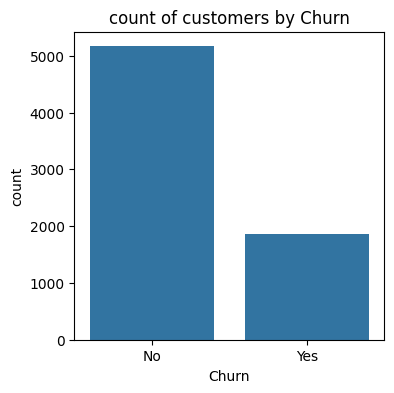

In [16]:
plt.figure(figsize=(4,4))
sns.countplot(x="Churn", data=df)
plt.title("count of customers by Churn")
plt.show()
# churned vs non churned customers

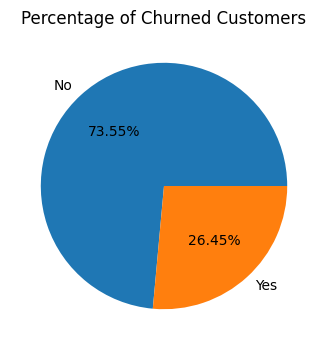

In [17]:
churn_counts = df["Churn"].value_counts()
plt.figure(figsize=(4,4))
# pie chart of churn percentage
plt.pie(churn_counts, labels=churn_counts.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers")

plt.show()

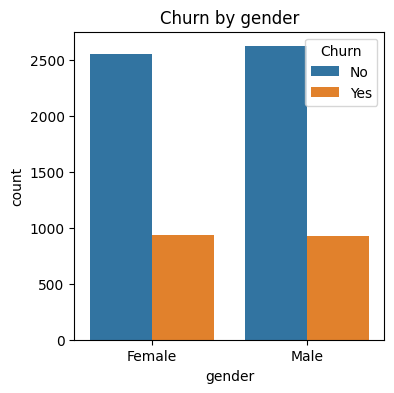

In [18]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender", hue="Churn", data=df) # comparing churn based on gender
plt.title("Churn by gender")
plt.show()

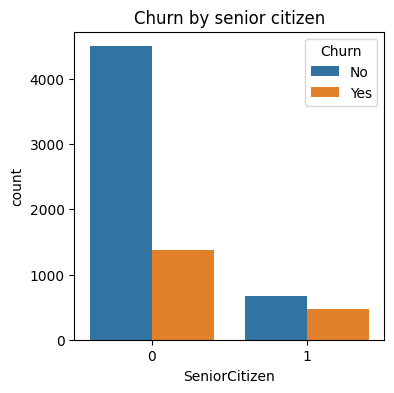

In [19]:
# comparing churn for senior citizens
plt.figure(figsize=(4,4))
sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
plt.title("Churn by senior citizen")
plt.show()

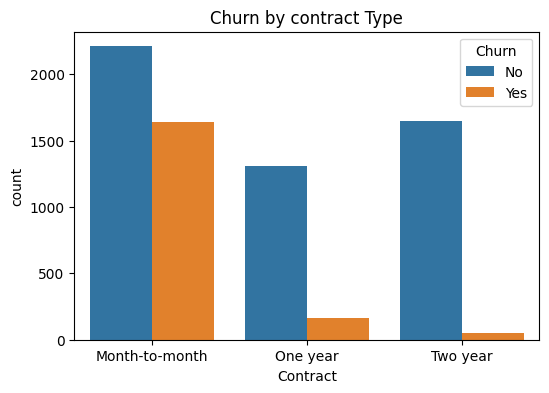

In [20]:
# churn comparison for different contract types
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by contract Type")
plt.show()

In [21]:
cols = df.select_dtypes(include=["object", "string"]).columns #selecting category cols 

le = LabelEncoder()
#using loop for converting into binary number form 
for col in cols:
    df[col] = le.fit_transform(df[col]) 

In [22]:
df.select_dtypes(include=["object", "string"]).columns #verified that column has coverted 

Index([], dtype='str')

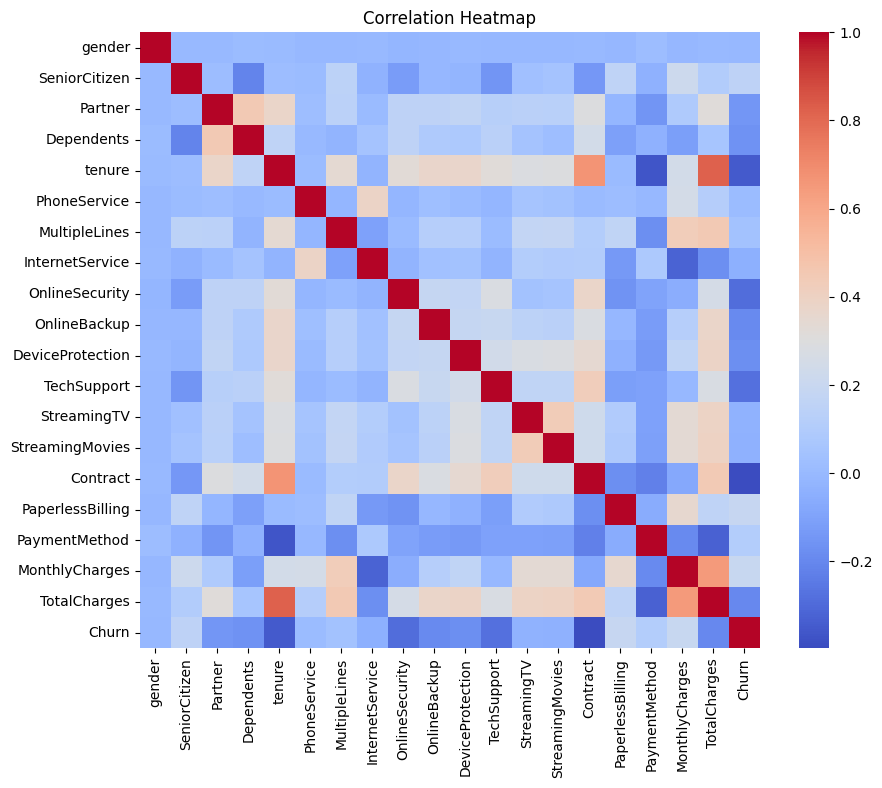

In [23]:
























# correlation heatmap to understand relationship between features
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# Observed Churn patterns

In [25]:
#Model building and evaluation

In [26]:
# separating input features and target 
input_features = df.drop("Churn", axis=1)
target = df["Churn"]

In [27]:
# scaling input feature values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(input_features)

In [28]:
#splitting data into training and testing parts 80:20 
train_input, test_input, train_output, test_output = train_test_split(scaled_features, target, test_size=0.2)

In [29]:
# logistic regression model
model = LogisticRegression()
model.fit(train_input, train_output) #training the model here

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [30]:
# making predictions on test data
predictions = model.predict(test_input)


In [31]:
# checking accuracy and recall 
accuracy = accuracy_score(test_output, predictions)
recall = recall_score(test_output, predictions)
print("Accuracy-", accuracy)
print("Recall-", recall)

Accuracy- 0.8185053380782918
Recall- 0.5864022662889519


In [32]:
print(classification_report(test_output, predictions))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1052
           1       0.66      0.59      0.62       353

    accuracy                           0.82      1405
   macro avg       0.76      0.74      0.75      1405
weighted avg       0.81      0.82      0.82      1405



In [33]:
# creating random forest model
rf_model = RandomForestClassifier()

In [34]:
# training random forest model
rf_model.fit(train_input, train_output)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [35]:
# making predictions using random forest
rf_predictions = rf_model.predict(test_input)

In [36]:
rf_accuracy = accuracy_score(test_output, rf_predictions)
rf_recall = recall_score(test_output, rf_predictions)

print("Random forest accuracy:", rf_accuracy)
print("Random forest recall:", rf_recall)


Random forest accuracy: 0.802846975088968
Random forest recall: 0.5014164305949008


In [37]:
# comparining both the Models Regress Logistics vs Random forest

In [38]:
models = ["Logistic Regression", "Random Forest"]
accuracy_values = [accuracy, rf_accuracy]

# storing recall values
recall_values = [recall, rf_recall]

# creating dataframe for comparison
comparison = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy_values,
    "Recall": recall_values
})

print(comparison)

                 Model  Accuracy    Recall
0  Logistic Regression  0.818505  0.586402
1        Random Forest  0.802847  0.501416


Logistic Regression:
Correctly predicted  81% overall
Caught 59% of actual churn customers

Random Forest:
Correctly predicted 80% overall
Caught 50% of actual churn customers

In [39]:
#Conclusion